# NCI GDC Dataset Analisys

### Download the dataset

In [1]:
!mkdir slides

In [2]:
%ls

sample_data/  slides/


In [4]:
%cd slides
!chmod +x gdc-client
!./gdc-client download -m gdc_manifest_20230223_173244.txt
%cd -

/content/slides
100% [#############################################] Time:  0:00:05  54.0 MiB/s 
100% [#############################################] Time:  0:00:04  47.3 MiB/s 
100% [#############################################] Time:  0:00:03  48.6 MiB/s 
100% [#############################################] Time:  0:00:02  44.8 MiB/s 
100% [#############################################] Time:  0:00:04  54.8 MiB/s 
100% [#############################################] Time:  0:00:03  55.6 MiB/s 
Successfully downloaded: 6
/content


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5226799/
http://wwwx.cs.unc.edu/~mn/sites/default/files/macenko2009.pdf

### List available images

In [5]:
import os
import pandas as pd

In [6]:
SLIDES_PATH = './slides'

manifest = pd.read_csv(
    SLIDES_PATH+'/gdc_manifest_20230223_173244.txt', 
    delimiter='\t'
)
manifest.head()
    

,id,filename,md5,size,state
0,11512d52-3fcc-43c3-a5d3-4222aa697a0f,TCGA-AR-A2LR-01A-01-TSA.E8716040-4787-4C4B-903...,c30e64bea19e3bd24323133794d7b92f,120103269,validated
1,321a3951-c6ca-4cb9-8fda-99142fdbc8db,TCGA-A8-A084-01A-02-BS2.17dfc662-eae2-414b-96c...,1fc87bbaa277bbfba2c3d2d3bd5f384e,244236173,validated
2,4ac106a0-30f2-467d-9a84-1261987bd2e5,TCGA-A8-A09K-01A-01-TS1.8443b0b9-57e1-4bd2-957...,2ee97dc50487e10b7b4a36b0bd2c7cf9,338802085,validated
3,57da4a8b-b09b-444d-b484-967d54f1408a,TCGA-AR-A2LL-01A-01-TSA.DB96FA2A-150F-4387-9F4...,e33bb83371e81ff06fb7dd6fb1828a5f,191879471,validated
4,7ea230ca-53e3-464d-ae89-2e1541023330,TCGA-AC-A7VC-01A-01-TS1.BB26DD06-AFA5-4F5D-A6F...,770c20484512ebf7e806eecd3ffb8baf,204072265,validated


In [7]:
!apt update && apt install -y openslide-tools
!pip install openslide-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,000 kB]
Hit:14 http://ppa.launchpad.net/graph

In [8]:
#import pyvips
from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [9]:
slide = 0

In [10]:
f"{SLIDES_PATH}/{manifest.id[slide]}/{manifest.filename[slide]}"

'./slides/11512d52-3fcc-43c3-a5d3-4222aa697a0f/TCGA-AR-A2LR-01A-01-TSA.E8716040-4787-4C4B-903F-B26AB7FBDD6E.svs'

In [11]:
#Load the slide file (svs) into an object.
slide = open_slide(f"{SLIDES_PATH}/{manifest.id[slide]}/{manifest.filename[slide]}")

slide_props = slide.properties

print("Vendor is:", slide_props['openslide.vendor'])
print("Pixel size of X in um is:", slide_props['openslide.mpp-x'])
print("Pixel size of Y in um is:", slide_props['openslide.mpp-y'])

#Objective used to capture the image
objective = float(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])
print("The objective power is: ", objective)

Vendor is: aperio
Pixel size of X in um is: 0.248
Pixel size of Y in um is: 0.248
The objective power is:  40.0


(70447, 24469)


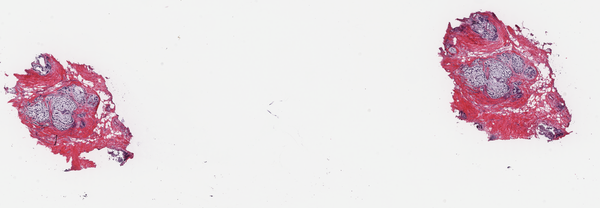

In [12]:
# get slide dimensions for the level 0 - max resolution level
slide_dims = slide.dimensions
print(slide_dims)

#Get a thumbnail of the image and visualize
slide_thumb_600 = slide.get_thumbnail(size=(600, 600))
slide_thumb_600

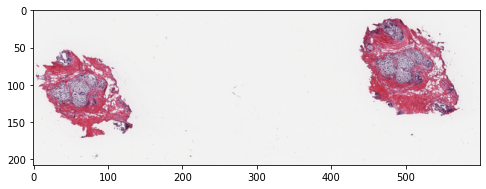

In [13]:
#Convert thumbnail to numpy array
slide_thumb_600_np = np.array(slide_thumb_600)
plt.figure(figsize=(8,8))
plt.imshow(slide_thumb_600_np)    

In [14]:
#Get slide dims at each level. Remember that whole slide images store information
#as pyramid at various levels
dims = slide.level_dimensions

num_levels = len(dims)
print("Number of levels in this image are:", num_levels)

print("Dimensions of various levels in this image are:", dims)

#By how much are levels downsampled from the original image?
factors = slide.level_downsamples
print("Each level is downsampled by an amount of: ", factors)

Number of levels in this image are: 4
Dimensions of various levels in this image are: ((70447, 24469), (17611, 6117), (4402, 1529), (2201, 764))
Each level is downsampled by an amount of:  (1.0, 4.000166913453699, 16.003338826605066, 32.017150997523736)


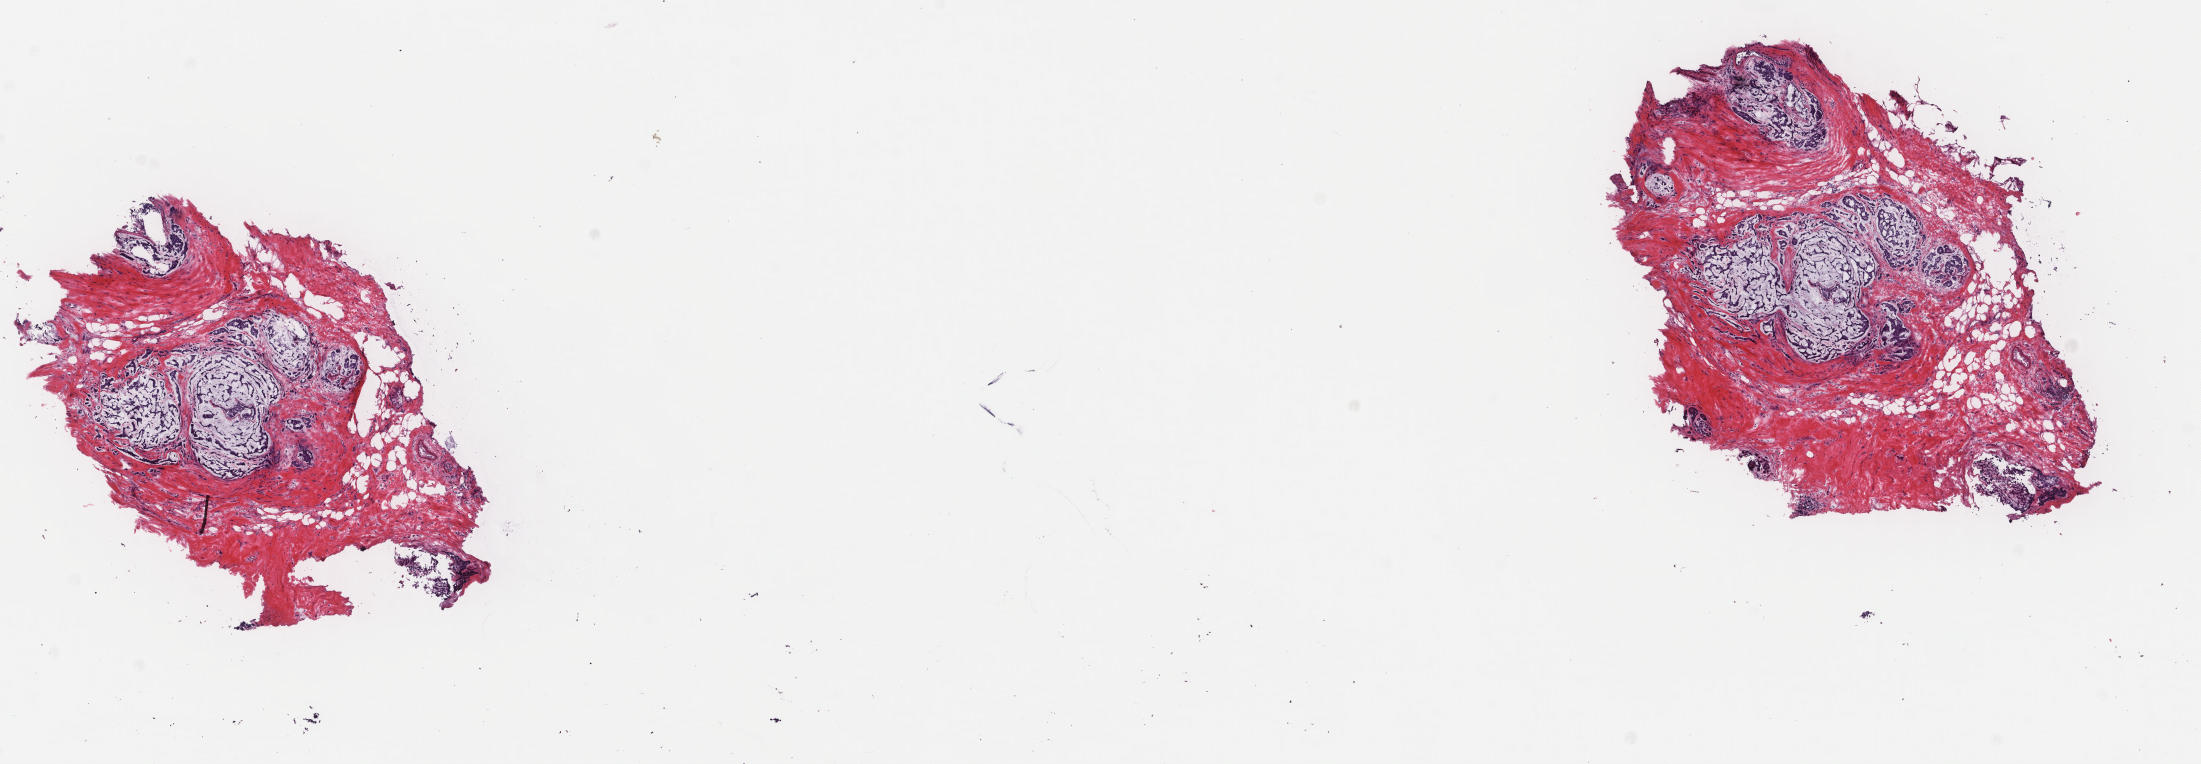

In [15]:
#Copy an image from a level
level4_dim = dims[3]

#Size of your output image
#Remember that the output would be a RGBA image (Not, RGB)
level4_img = slide.read_region((0,0), 3, level4_dim) #Pillow object, mode=RGBA

#Convert the image to RGB
level4_img_RGB = level4_img.convert('RGB')
level4_img_RGB

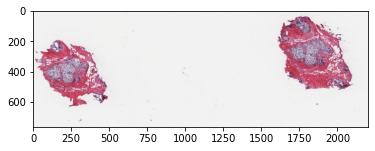

In [16]:
#Convert the image into numpy array for processing
level4_img_np = np.array(level4_img_RGB)
plt.imshow(level4_img_np)

In [17]:
#Return the best level for displaying the given downsample.
SCALE_FACTOR = 32
best_level = slide.get_best_level_for_downsample(SCALE_FACTOR)
#Here it returns the best level to be 2 (third level)
#If you change the scale factor to 2, it will suggest the best level to be 0 (our 1st level)
#################################

#Generating tiles for deep learning training or other processing purposes
#We can use read_region function and slide over the large image to extract tiles
#but an easier approach would be to use DeepZoom based generator.
# https://openslide.org/api/python/

from openslide.deepzoom import DeepZoomGenerator

#Generate object for tiles using the DeepZoomGenerator
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)
#Here, we have divided our svs into tiles of size 256 with no overlap. 

#The tiles object also contains data at many levels. 
#To check the number of levels
print("The number of levels in the tiles object are: ", tiles.level_count)

print("The dimensions of data in each level are: ", tiles.level_dimensions)

#Total number of tiles in the tiles object
print("Total number of tiles = : ", tiles.tile_count)

The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 1), (3, 1), (5, 2), (9, 3), (18, 6), (35, 12), (69, 24), (138, 48), (276, 96), (551, 192), (1101, 383), (2202, 765), (4403, 1530), (8806, 3059), (17612, 6118), (35224, 12235), (70447, 24469))
Total number of tiles = :  35355


In [18]:
#How many tiles at a specific level?
level_num = 17
level_dim = tiles.level_tiles[level_num]
print("Tiles at level ", level_num, " is: ", level_dim)
print("This means there are ", level_dim[0]*level_dim[1], " total tiles in this level")

#Dimensions of the tile (tile size) for a specific tile from a specific layer
tile_dims = tiles.get_tile_dimensions(level_num, (0,0)) #Provide deep zoom level and address (column, row)
print("Tile (0,0)'s shape at level ", level_num, " is: ", tile_dims)


#Dimensions of the tile (tile size) for a specific tile from a specific layer
tile_dims = tiles.get_tile_dimensions(level_num, (level_dim[0]-1, level_dim[1]-1)) #Provide deep zoom level and address (column, row)
print("Tile ", (level_dim[0]-1, level_dim[1]-1), "'s shape at level ", level_num, " is: ", tile_dims)

Tiles at level  17  is:  (276, 96)
This means there are  26496  total tiles in this level
Tile (0,0)'s shape at level  17  is:  (256, 256)
Tile  (275, 95) 's shape at level  17  is:  (47, 149)


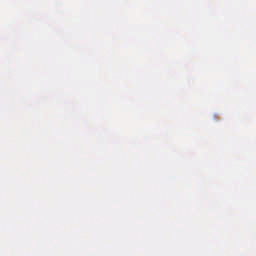

In [19]:
single_tile = tiles.get_tile(17, (62, 70)) #Provide deep zoom level and address (column, row)
single_tile_RGB = single_tile.convert('RGB')
single_tile_RGB

In [20]:
def norm_HnE(img, Io=240, alpha=1, beta=0.15):


    ######## Step 1: Convert RGB to OD ###################
    ## reference H&E OD matrix.
    #Can be updated if you know the best values for your image. 
    #Otherwise use the following default values. 
    #Read the above referenced papers on this topic. 
    HERef = np.array([[0.5626, 0.2159],
                      [0.7201, 0.8012],
                      [0.4062, 0.5581]])
    ### reference maximum stain concentrations for H&E
    maxCRef = np.array([1.9705, 1.0308])
    
    
    # extract the height, width and num of channels of image
    h, w, c = img.shape
    
    # reshape image to multiple rows and 3 columns.
    #Num of rows depends on the image size (wxh)
    img = img.reshape((-1,3))
    
    # calculate optical density
    # OD = −log10(I)  
    #OD = -np.log10(img+0.004)  #Use this when reading images with skimage
    #Adding 0.004 just to avoid log of zero. 
    
    OD = -np.log10((img.astype(np.float)+1)/Io) #Use this for opencv imread
    #Add 1 in case any pixels in the image have a value of 0 (log 0 is indeterminate)
    
    
    ############ Step 2: Remove data with OD intensity less than β ############
    # remove transparent pixels (clear region with no tissue)
    ODhat = OD[~np.any(OD < beta, axis=1)] #Returns an array where OD values are above beta
    #Check by printing ODhat.min()
    
    ############# Step 3: Calculate SVD on the OD tuples ######################
    #Estimate covariance matrix of ODhat (transposed)
    # and then compute eigen values & eigenvectors.
    eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
    
    
    ######## Step 4: Create plane from the SVD directions with two largest values ######
    #project on the plane spanned by the eigenvectors corresponding to the two 
    # largest eigenvalues    
    That = ODhat.dot(eigvecs[:,1:3]) #Dot product
    
    ############### Step 5: Project data onto the plane, and normalize to unit length ###########
    ############## Step 6: Calculate angle of each point wrt the first SVD direction ########
    #find the min and max vectors and project back to OD space
    phi = np.arctan2(That[:,1],That[:,0])
    
    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100-alpha)
    
    vMin = eigvecs[:,1:3].dot(np.array([(np.cos(minPhi), np.sin(minPhi))]).T)
    vMax = eigvecs[:,1:3].dot(np.array([(np.cos(maxPhi), np.sin(maxPhi))]).T)
    
    
    # a heuristic to make the vector corresponding to hematoxylin first and the 
    # one corresponding to eosin second
    if vMin[0] > vMax[0]:    
        HE = np.array((vMin[:,0], vMax[:,0])).T
        
    else:
        HE = np.array((vMax[:,0], vMin[:,0])).T
    
    
    # rows correspond to channels (RGB), columns to OD values
    Y = np.reshape(OD, (-1, 3)).T
    
    # determine concentrations of the individual stains
    C = np.linalg.lstsq(HE,Y, rcond=None)[0]
    
    # normalize stain concentrations
    maxC = np.array([np.percentile(C[0,:], 99), np.percentile(C[1,:],99)])
    tmp = np.divide(maxC,maxCRef)
    C2 = np.divide(C,tmp[:, np.newaxis])
    
    ###### Step 8: Convert extreme values back to OD space
    # recreate the normalized image using reference mixing matrix 
    
    Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
    Inorm[Inorm>255] = 254
    Inorm = np.reshape(Inorm.T, (h, w, 3)).astype(np.uint8)  
    
    # Separating H and E components
    
    H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
    H[H>255] = 254
    H = np.reshape(H.T, (h, w, 3)).astype(np.uint8)
    
    E = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,1], axis=1).dot(np.expand_dims(C2[1,:], axis=0))))
    E[E>255] = 254
    E = np.reshape(E.T, (h, w, 3)).astype(np.uint8)
    
    return (Inorm, H, E)

In [45]:
import shutil

shutil.rmtree(f"{SLIDES_PATH}/{manifest.id[0]}/tiles")

FileNotFoundError: ignored

In [49]:
###### Saving each tile to local directory
cols, rows = tiles.level_tiles[17]

import os
import threading

tile_dir = f"{SLIDES_PATH}/{manifest.id[0]}/tiles"
os.makedirs(tile_dir, exist_ok=True)
def save_loop(row1, col1):
    for row in row1:
        for col in col1:
            tile_name = os.path.join(tile_dir, '%d_%d' % (col, row))
            # print("Now saving tile with title: ", tile_name)
            temp_tile = tiles.get_tile(17, (col, row))
            temp_tile_RGB = temp_tile.convert('RGB')
            temp_tile_np = np.array(temp_tile_RGB)
            if temp_tile_np.mean() < 230 and temp_tile_np.std() > 15:
                # print("****Good tile number:", tile_name)
                print("Row: ", row)
                print("Column: ", col)
                plt.imsave(tile_name + ".png", temp_tile_np)
                norm_img, H_img, E_img = norm_HnE(temp_tile_np, Io=240, alpha=1, beta=0.15)
                
                #Save the norm tile, H and E tiles      
                plt.imsave(tile_name + "_norm.png", norm_img)
                plt.imsave(tile_name + "_H.png", H_img)
                plt.imsave(tile_name + "_E.png", E_img)

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))
t1r, t2r, t3r = split(range(rows), 3)
t1c, t2c, t3c = split(range(cols), 3)

t1 = threading.Thread(target=save_loop, args=(t1r,t1c, ))
t2 = threading.Thread(target=save_loop, args=(t2r,t1c, ))
t3 = threading.Thread(target=save_loop, args=(t3r,t1c, ))
t4 = threading.Thread(target=save_loop, args=(t1r,t2c, ))
t5 = threading.Thread(target=save_loop, args=(t2r,t2c, ))
t6 = threading.Thread(target=save_loop, args=(t3r,t2c, ))
t7 = threading.Thread(target=save_loop, args=(t1r,t3c, ))
t8 = threading.Thread(target=save_loop, args=(t2r,t3c, ))
t9 = threading.Thread(target=save_loop, args=(t3r,t3c, ))

# starting thread 1
t1.start()
# starting thread 2
t2.start()
# starting thread 3
t3.start()
# starting thread 4
t4.start()
# starting thread 5
t5.start()
# starting thread 6
t6.start()
# starting thread 7
t7.start()
# starting thread 8
t8.start()
# starting thread 9
t9.start()


# # wait until thread 1 is completely executed
# t1.join()
# # wait until thread 2 is completely executed
# t2.join()
print("Done")

Done


Exception in thread Thread-18:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-49-f359c262a064>", line 14, in save_loop
  File "/usr/local/lib/python3.8/dist-packages/openslide/deepzoom.py", line 173, in get_tile
    tile = self._osr.read_region(*args)
  File "/usr/local/lib/python3.8/dist-packages/openslide/__init__.py", line 236, in read_region
    return lowlevel.read_region(
  File "/usr/local/lib/python3.8/dist-packages/openslide/lowlevel.py", line 311, in read_region
Exception in thread Thread-20:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-49-f359c262a064>", line 14, in save_loo

In [48]:
# !cd ~
# !ls

In [44]:
%ls | wc -l

5831
